In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

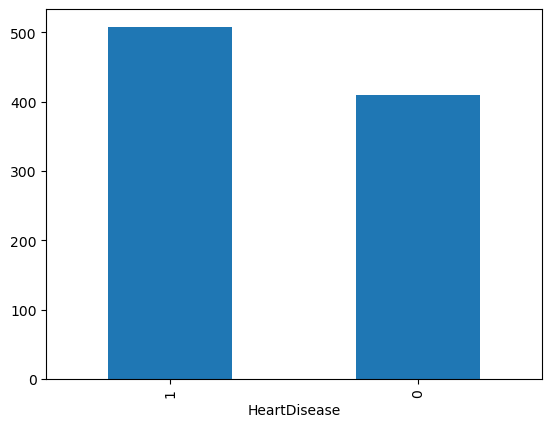

In [8]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

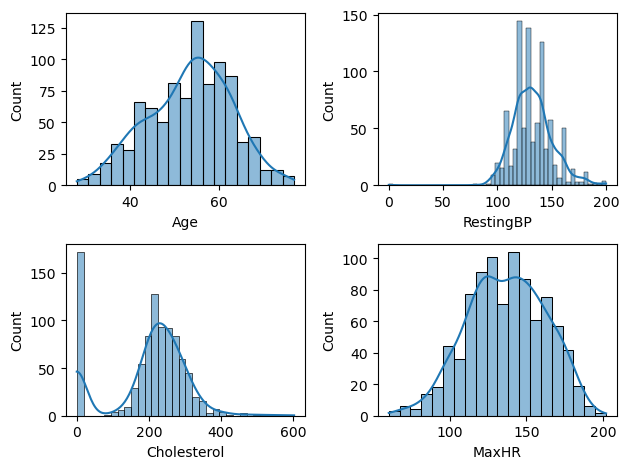

In [11]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [12]:
cholesterol_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()

# Step 2: Replace 0s with the calculated mean
df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_mean)

# Optional: Round to 2 decimal places (if needed)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [13]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

In [14]:
!pip install sheryanalysis==0.1.0

In [15]:
import sheryanalysis
sheryanalysis.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

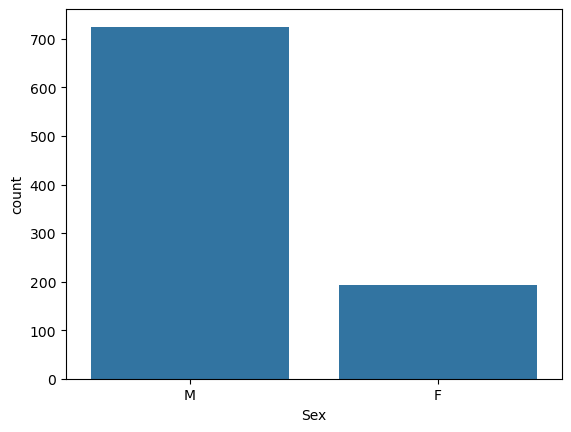

In [16]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

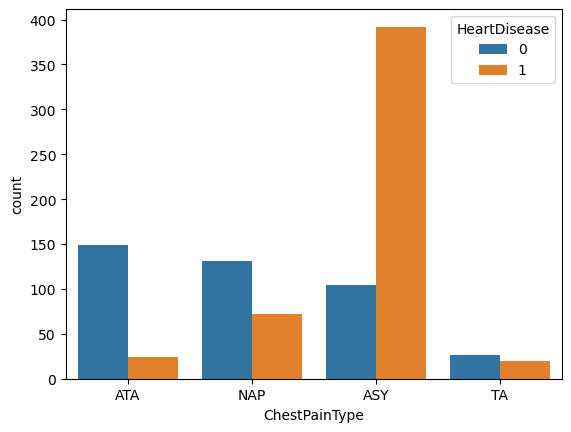

In [17]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])


<Axes: xlabel='FastingBS', ylabel='count'>

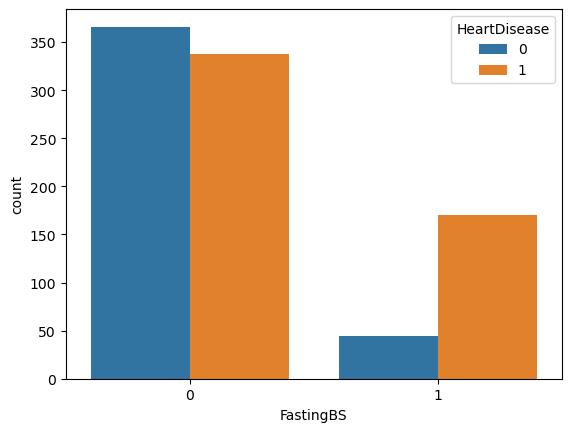

In [18]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])


<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

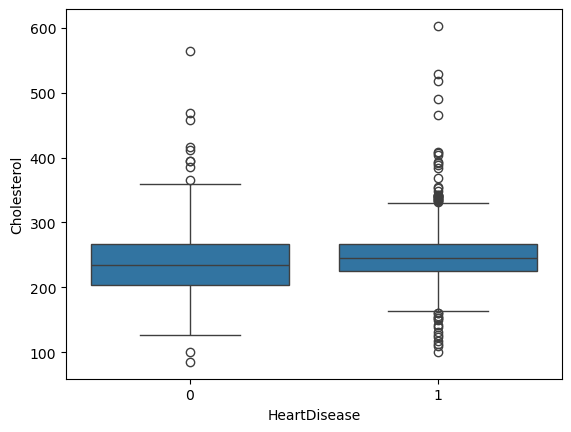

In [19]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

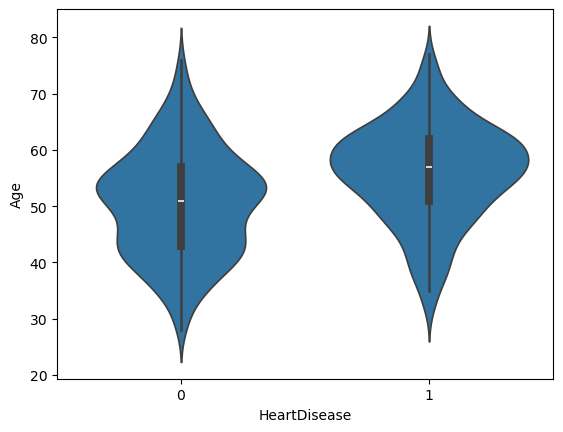

In [20]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

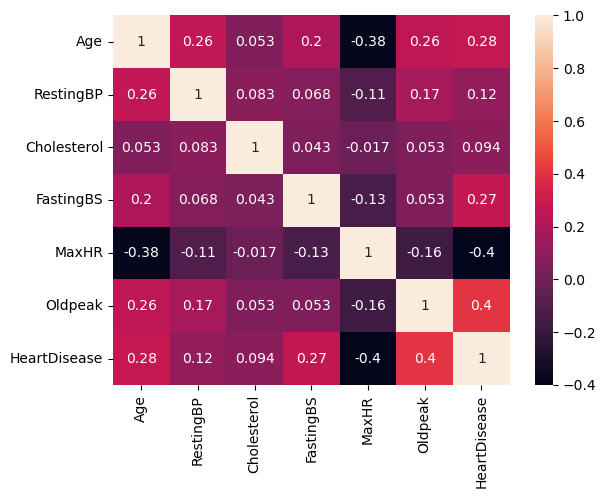

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# DATA PReprocessing and cleaning

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [23]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [24]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [25]:
df_encoded = df_encoded.astype(int)

In [26]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [27]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [28]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [29]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# Logistic Regression
# Ridge Classifier
# Decision Tree Classifier
# Random Forest Classifier
# Gradient Boosting Classifier
# AdaBoost Classifier
# XGBoost Classifier
# SVC 
# KNN Classifier
# BernoulliNB
Logistic_Regression=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("model",LogisticRegression())
])
Ridge_Classifier=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("model",RidgeClassifier())
])
AdaBoost_Classifier=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("model",AdaBoostClassifier())
])
SVC_model =Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("model",SVC())
])
KNN_Classifier=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("model",KNeighborsClassifier())
])
BernoulliNB_model=Pipeline(steps=[
    ("scaler",StandardScaler()),
    ("model",BernoulliNB())
])
Decision_Tree_Classifier=DecisionTreeClassifier()
Random_Forest_Classifier=RandomForestClassifier()
Gradient_Boosting_Classifier=GradientBoostingClassifier()
XGBoost_Classifier=XGBClassifier()


In [32]:
models={
    "Logistic Regression":Logistic_Regression,
    "Ridge Classifier":Ridge_Classifier,
    "Decision Tree Classifier":Decision_Tree_Classifier,
    "Random Forest Classifier":Random_Forest_Classifier,
    "Gradient Boosting Classifier":Gradient_Boosting_Classifier,
    "AdaBoost Classifier":AdaBoost_Classifier,
    "XGBoost Classifier":XGBoost_Classifier,
    "SVC":SVC_model,
    "KNN Classifier":KNN_Classifier,
    "BernoulliNB":BernoulliNB_model
}

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,f1_score
results=[]
for name,model in models.items():
    score=cross_val_score(model,X,y,cv=5,scoring="recall")
    print(f"{name}")
    print("Score",score)
    print("Recall",score.mean())
    #print("classification_report",classification_report())
    print()

Logistic Regression
Score [0.87254902 0.81372549 0.98039216 0.92079208 0.73267327]
Recall 0.864026402640264

Ridge Classifier
Score [0.88235294 0.78431373 0.98039216 0.91089109 0.74257426]
Recall 0.860104834012813

Decision Tree Classifier
Score [0.67647059 0.67647059 0.91176471 0.77227723 0.71287129]
Recall 0.7499708794408851

Random Forest Classifier
Score [0.91176471 0.75490196 0.98039216 0.9009901  0.73267327]
Recall 0.856144437973209

Gradient Boosting Classifier
Score [0.83333333 0.78431373 0.98039216 0.86138614 0.7029703 ]
Recall 0.8324791302659678

AdaBoost Classifier
Score [0.8627451  0.79411765 0.99019608 0.88118812 0.7029703 ]
Recall 0.8462434478741991

XGBoost Classifier
Score [0.81372549 0.75490196 0.96078431 0.84158416 0.66336634]
Recall 0.8068724519510774

SVC
Score [0.8627451  0.7745098  0.97058824 0.91089109 0.76237624]
Recall 0.856222092797515

KNN Classifier
Score [0.92156863 0.74509804 0.95098039 0.91089109 0.77227723]
Recall 0.8601630751310424

BernoulliNB
Score [0

In [34]:

# results=[]
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     results.append({
#         'Model': name,
#         'Accuracy': round(acc, 4),
#         'F1 Score': round(f1, 4)
#     })

In [35]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [36]:
numerical=['Age','RestingBP','Cholesterol','MaxHR']
categorycal=['FastingBS','Oldpeak','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_Normal','RestingECG_ST','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import SplineTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])
categorycal_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("scaler",OneHotEncoder(handle_unknown="ignore"))
])

preprocessing=ColumnTransformer([
    ("num",numerical_transform,numerical),
    ("cat",categorycal_transform,categorycal)
])

lg_pipeline=Pipeline(steps=[
    ("preprocessing",preprocessing),
    ("regressor",Logistic_Regression)
])

In [38]:
lg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['FastingBS', 'Oldpeak',
                                                   'Sex_M', 'ChestPainType_ATA',
                                                   'ChestPainType_NAP',
                                                   'ChestPainType_TA',
                                                   'RestingECG_Normal',
                                                   'RestingECG_ST',
                                                   'ExerciseAngina_Y',
                                                   'ST_Slope_Flat',
                                                   'ST_Slope_Up'])])),
                ('regressor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('model', LogisticRegression())]))])

In [39]:
predict_pip=lg_pipeline.predict(X_test)

In [40]:
test=pd.DataFrame([{
    'Age':49,
    'RestingBP':160,
    'Cholesterol':180,
    'MaxHR':156,
    'FastingBS':0,
    'Oldpeak':1,
    'Sex_M':0,
    'ChestPainType_ATA':0,
    'ChestPainType_NAP':1,
    'ChestPainType_TA':0,
    'RestingECG_Normal':1,
    'RestingECG_ST':0,
    'ExerciseAngina_Y':0,
    'ST_Slope_Flat':1,
    'ST_Slope_Up':0
}])

pipe_pre=lg_pipeline.predict(test)

In [41]:
pipe_pre

array([0])

In [42]:
print(classification_report(y_test,predict_pip))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [43]:
predict_pip

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1])

In [44]:
import pickle
pickle.dump(lg_pipeline,open("model_pipe.pkl", "wb"))

In [45]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, f1_score, classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

In [46]:
# X = df_encoded.drop('HeartDisease', axis=1)
# y = df_encoded['HeartDisease']

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.2, random_state=42)

In [48]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [49]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "KNN": KNeighborsClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "SVM (RBF Kernel)": SVC(probability=True)
# }


In [50]:
# results = []

In [51]:
# for name, model in models.items():
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)
#     acc = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     results.append({
#         'Model': name,
#         'Accuracy': round(acc, 4),
#         'F1 Score': round(f1, 4)
#     })

In [52]:
# results

In [53]:
# import joblib
# joblib.dump(models['KNN'],'KNN_heart.pkl')
# joblib.dump(scaler,'scaler.pkl')
# joblib.dump(X.columns.tolist(),'columns.pkl')


In [54]:
# import pickle
# pickle.dump(models['KNN'],open("model.pkl", "wb"))